#### Anna Feldman 
#### INFO615 Assignment 3

1. Read the CSV into a DataFrame called df and convert any timestamp columns into datetime types.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_zipped_csv(url, filename=False):
    from zipfile import ZipFile
    from io import BytesIO
    from urllib.request import urlopen

    r = urlopen(url).read()
    b = BytesIO(r)
    file = ZipFile(b)
    if not filename:        
        filename = url.split("/")[-1].replace(".zip","")
    data = file.open(filename)
    df = pd.read_csv(data)
    return df

In [3]:
citi_url="data/citibike_sample.csv"
url="data/citibike_sample.csv.zip"

In [9]:
df = pd.read_csv(citi_url)
#df2 = read_zipped_csv(url) #-- throwing an error for the zip file

In [10]:
df.head()

tripduration                starttime                 stoptime  \
0          1309  2020-10-27 16:51:37.994  2020-10-27 17:13:27.103   
1          1553  2020-10-09 19:46:12.616  2020-10-09 20:12:06.366   
2           437  2020-10-10 15:19:17.455  2020-10-10 15:26:34.470   
3          1490  2020-10-28 01:30:42.644  2020-10-28 01:55:33.210   
4          1178  2020-10-11 16:48:46.773  2020-10-11 17:08:24.976   

   start station id       start station name  start station latitude  \
0              3457    E 58 St & Madison Ave               40.763026   
1              3815          E 51 St & 2 Ave               40.755293   
2              3096      Union Ave & N 12 St               40.719240   
3              3821  Evergreen Ave & Noll St               40.701060   
4              3417        Baltic St & 5 Ave               40.679577   

   start station longitude  end station id  \
0               -73.972095            3534   
1               -73.967641            3641   
2               -73.952420            3086   
3               -73.933180            3058   
4               -73.978550            3300   

                     end station name  end station latitude  ...    usertype  \
0  Frederick Douglass Blvd & W 117 St             40.805159  ...  Subscriber   
1                  Broadway & W 25 St             40.742869  ...  Subscriber   
2           Graham Ave & Conselyea St             40.715143  ...  Subscriber   
3           Lewis Ave & Kosciuszko St             40.692371  ...  Subscriber   
4           Prospect Park West & 8 St             40.665147  ...  Subscriber   

   birth year  gender  tripduration_minutes starttime_dayname  \
0        1983    male             21.816667           Tuesday   
1        1996    male             25.883333            Friday   
2        1984  female              7.283333          Saturday   
3        1989    male             24.833333         Wednesday   
4        1978    male             19.633333            Sunday   

   stoptime_dayname starttime_hour stoptime_hour  age  distance_miles  
0           Tuesday             16            17   37        3.047236  
1            Friday             19            20   24        1.418907  
2          Saturday             15            15   36        0.502512  
3         Wednesday              1             1   31        0.633161  
4            Sunday             16            17   42        1.002208  

[5 rows x 22 columns]

In [11]:
#Convert any and all timestamp data to datetime data types
df['stoptime'] = pd.to_datetime(df['stoptime']) 
df['starttime'] = pd.to_datetime(df['starttime'])

2. usertype is a categorical variable representing user’s purchase type. Create the following charts to visualize the distribution of usertype in this sample:
   a) A histogram showing the total number of observations segmented by user type.
   b) A histogram showing the percentage of observations segmented by user type.

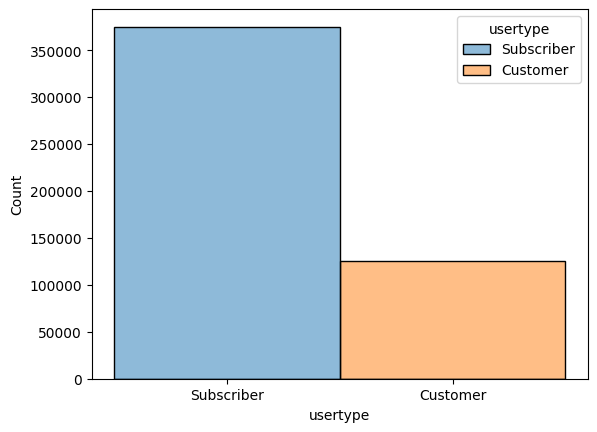

In [21]:
sns.histplot(data=df, x='usertype', hue='usertype'); 
#total number of observations segmented by user type

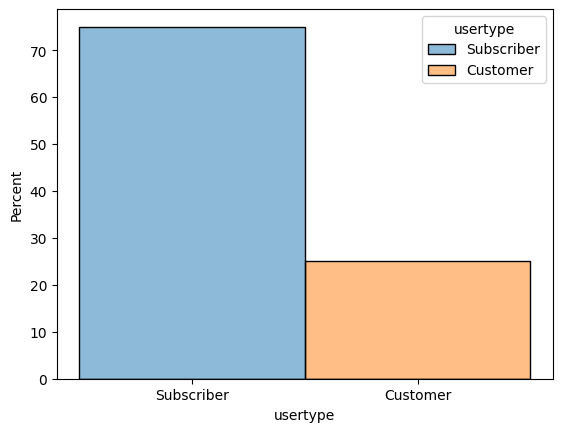

In [20]:
sns.histplot(data=df, x='usertype', stat= 'percent', hue='usertype'); 
#percentage of observations segmented by user type

3. gender is a categorical variable representing the user’s gender, per Citi Bike’s provided categories. Create the following charts to visualize the distribution of gender in this sample:
   a) A histogram showing the total number of observations segmented by gender.
   b) A histogram showing the percentage of observations segmented by gender.

In [52]:
#df['gender'].describe()

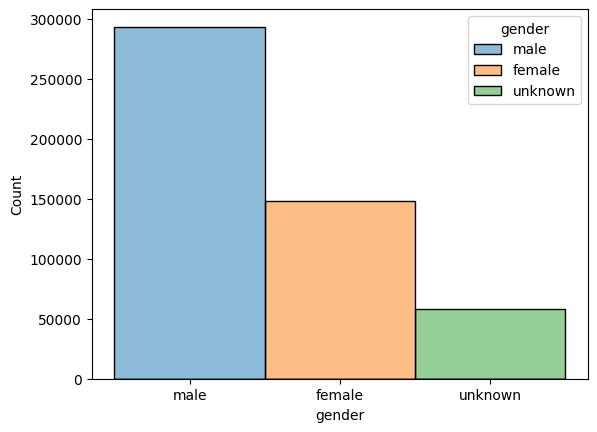

In [37]:
sns.histplot(data=df, x='gender', hue='gender'); 
#total number of observations segmented by user type, with unknowns

In [51]:
df_subgroup = df[df['gender'] != 'unknown']
print(df_subgroup[['gender']].head(20))
#creating a 2-type gender category removing unknowns for use later

    gender
0     male
1     male
2   female
3     male
4     male
5   female
6     male
8   female
9     male
11    male
12    male
13  female
16  female
18  female
19    male
20    male
21  female
22    male
23    male
24    male


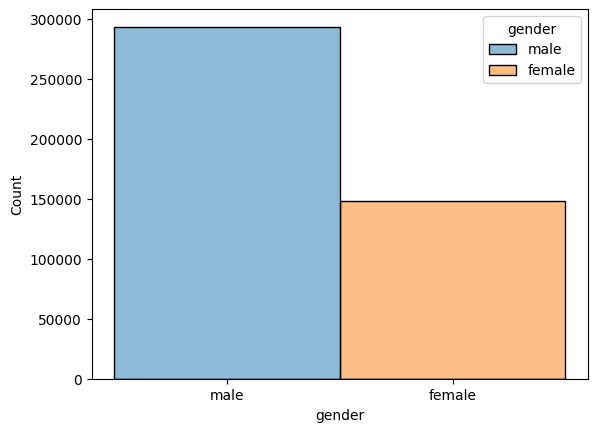

In [38]:
sns.histplot(data=df_subgroup, x='gender', hue='gender'); 
#total number of observations segmented by user type, without unknowns

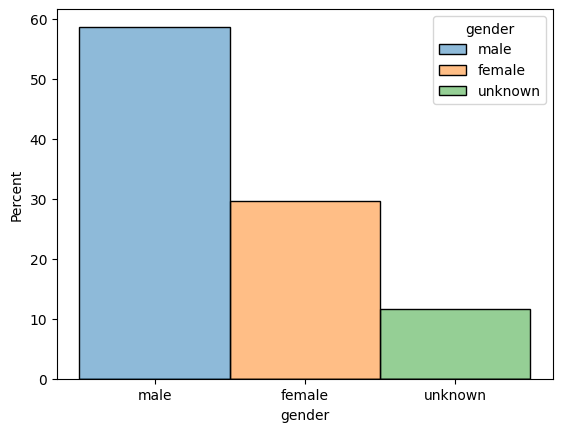

In [39]:
sns.histplot(data=df, x='gender', stat= 'percent', hue='gender'); 
#percentage of observations segmented by user type, with unknowns

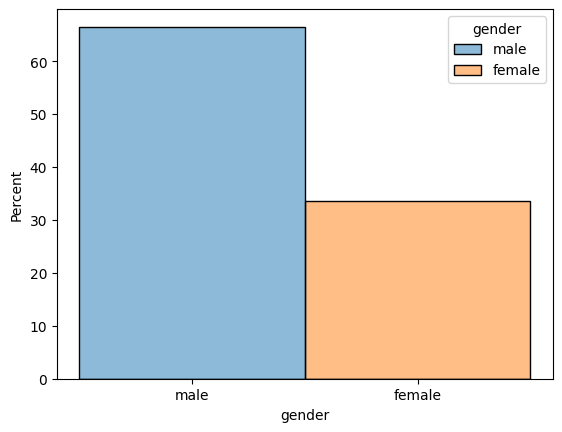

In [40]:
sns.histplot(data=df_subgroup, x='gender', stat= 'percent', hue='gender'); 
#percentage of observations segmented by user type, without unknowns

#### 4. tripduration_minutes is a continuous, numerical variable representing the duration of each trip in minutes. Perform the following exploratory analysis in order to develop an understanding of tripduration_minutes in this sample:

a) Provide a five-number summary for trip duration (minimum, 25th percentile, median, 75th percentile, maximum).

In [42]:
df['tripduration_minutes'].describe()

count    500000.000000
mean         17.324105
std          14.595441
min           3.000000
25%           7.733333
50%          13.200000
75%          22.500000
max         179.866667
Name: tripduration_minutes, dtype: float64

b) Make a histogram showing the percentage of observations distributed across bins of bin width equal to trip duration of 1 minute.

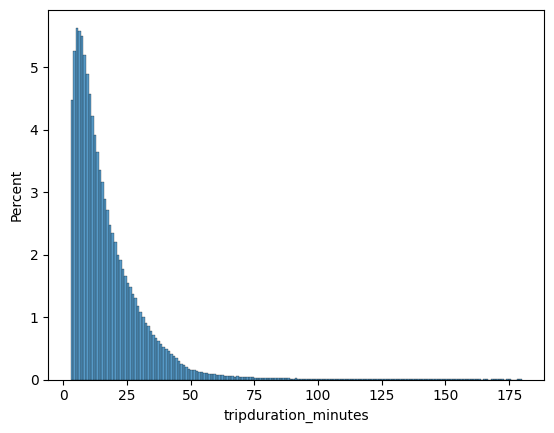

In [49]:
sns.histplot(data=df, x='tripduration_minutes', stat= 'percent', binwidth=1); 

c) Make a histogram showing the percentage of observations distributed across bins of bin width equal to trip duration of 5 minutes.

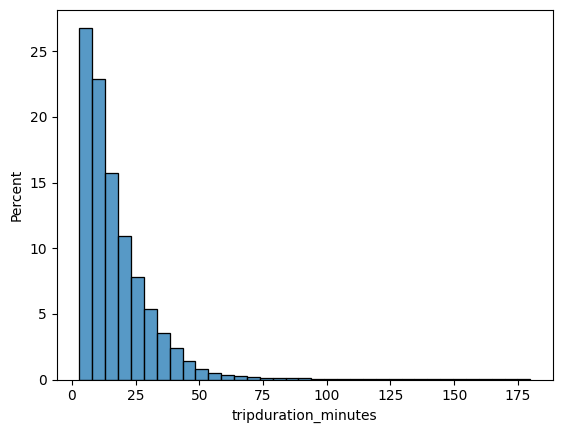

In [50]:
sns.histplot(data=df, x='tripduration_minutes', stat= 'percent', binwidth=5); 

d) Make a histogram showing the percentage of observations distributed across bins of bin width equal to trip duration of 30 minutes.

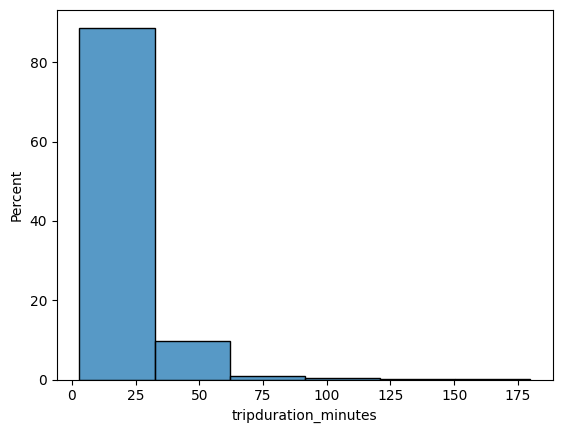

In [51]:
sns.histplot(data=df, x='tripduration_minutes', stat= 'percent', binwidth=30); 

e) Which bin width do you think is most appropriate for this analysis, and why?

#### Since we are looking at percentages and each section (bin) of the histogram must add up to a sum of 100%, it is probably important to be able to visually distinguish the individual bins. Depending on how much we want to aggregate and simplify these numbers, the bin width of 5 or 30 is probably most appropriate for this. However, with the smaller bin width of 1 or 5, you can more clearly see how the distribution is forming across the data, whereas the bin width of 30 loses a lot of that detail. Bin width of 5 seems to achieve the best of both of worlds.

f) Make a combined histogram and density plot representing trip duration, using the
kde=True parameter, and bin width set to 5 minutes.

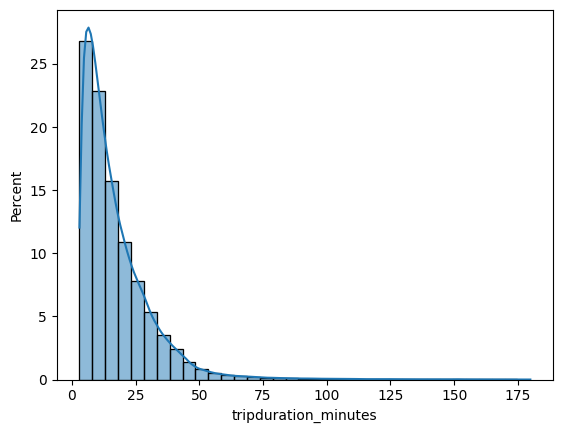

In [13]:
sns.histplot(data = df, x='tripduration_minutes', stat='percent', binwidth = 5, kde=True);

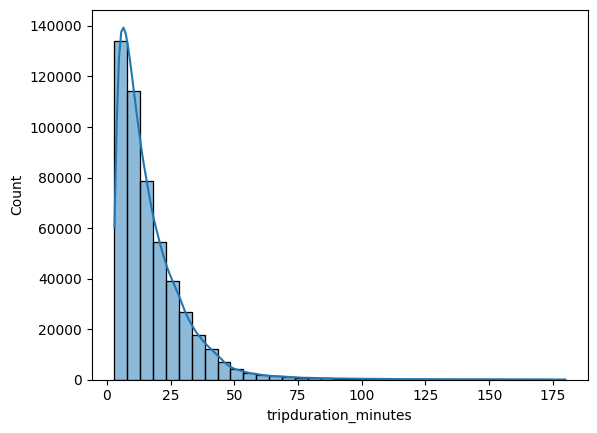

In [14]:
sns.histplot(data = df, x='tripduration_minutes', binwidth = 5, kde=True);

g) Do you see any downsides to using a density plot rather than a histogram in this
situation?

#### The histogram can be harder to interpret values between bins, but the kernel density plot requires the data analyst to choose and set an appropriate bandwidth, instead of bin width, to display a smoothed distribution from the data. This bandwidth might not reflect the distribution of the data in enough detail or fully correctly if not appropriate, e.g. if there are some small peaks or oscillations in the data or if the data is bounded. In this situation, if the kde is too smoothed, you would lose the detail of less dramatic peaks/valleys in the data, plus you also lose a sense of being able to identify the frequency of trips after the 60-ish minute mark due to the outlier data in the higher 100-175 minute range. Though there are very few trips at that maximum, there appear to be a number of trips occurring between 75-175 minutes that might not be outliers, but are so low they aren't visible in either plot and especially in the kde.

h) Make a density plot representing trip duration, grouped by user type. The result should be a single figure containing density plots for both types of users. Describe what you see in this plot. Do you notice any difference in trip duration between Subscribers and Customers?

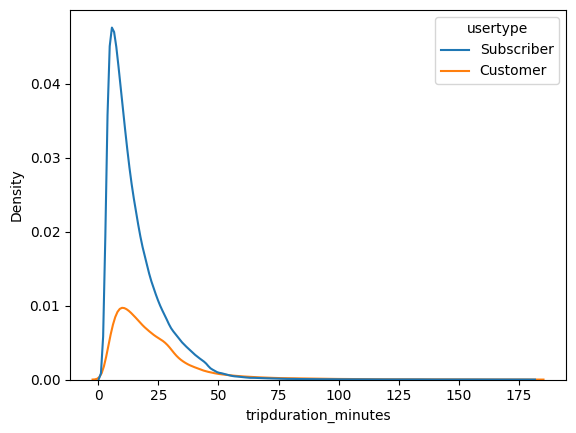

In [16]:
sns.kdeplot(data=df, x='tripduration_minutes', hue='usertype');

#### Both Subscribers and Customers see the most number of trip durations happen between 0 and 25 minutes, especially peaking around the 10-15 minute trip duration range. Customers also have a second, less dramatic peak of trip frequency around the 25-30 minute trip duration mark, whereas Subscribers appear to only have the single peak at 10-15 minutes. Both user types converge around the 50 minute mark.

i) Make a box plot representing trip duration. Do you see any potential outliers?

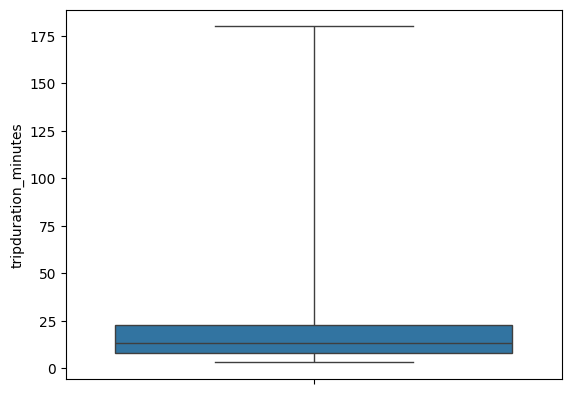

In [17]:
sns.boxplot(y=df['tripduration_minutes'], whis=[0,100]);

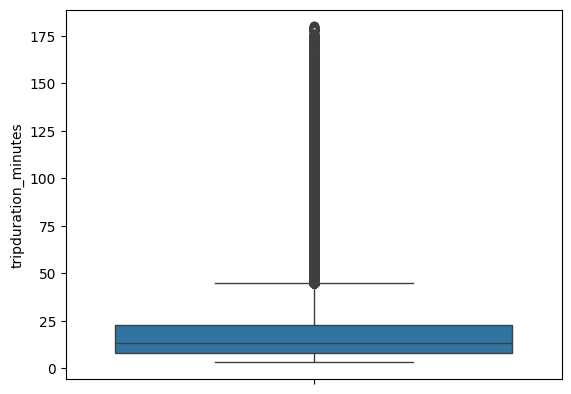

In [49]:
sns.boxplot(y=df['tripduration_minutes'], whis=1.5);

#### The upper bound at 175 minutes seems to be a major outlier based on the average/mean and median, and with how the data visually appears skewed towards these summary statistics, all of which lie below the 25 minute mark. When I then set the whiskers to 1.5 times the interquartile range, it makes the 50-175 minute range of trip durations seem even more like the major outlier range for trip duration times.

j) Make a strip plot representing trip duration, setting the alpha parameter to 0.1 to increase transparency. Strip plots are sometimes used to serve as a complement to box plots. Do you think the strip plot adds any value in this situation, compared to just a box plot on its own?

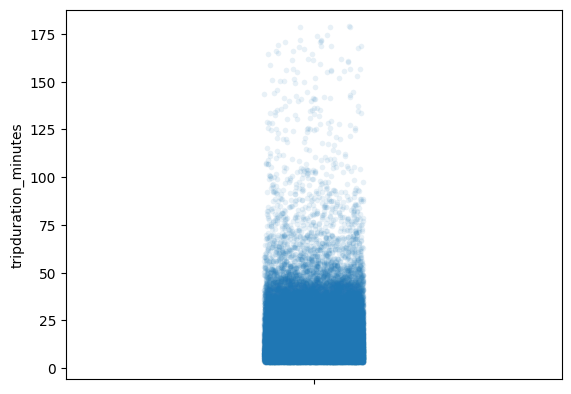

In [22]:
sns.stripplot(data=df.sample(50000), y='tripduration_minutes', alpha=0.1, size=4);

#### Yes, since the strip plot visualizes the number of actual data points, I think the strip plot gives a visual sense of how very few data points are distributed up in the uppermost region of 100-175 minutes, compared to below the 50-minute mark, whereas the box plot only displays the 5 key summary statistics without illustrating this more visual sense of distribution of the entire dataset.

k) Swarm plots are alternatives to strip plots. Make a swarm plot visualizing trip duration for a sample of just 2,000 observations. Name at least one advantage and one disadvantage that swarm plots have compared to strip plots.

/Users/annafeldman/miniconda3/envs/info615/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


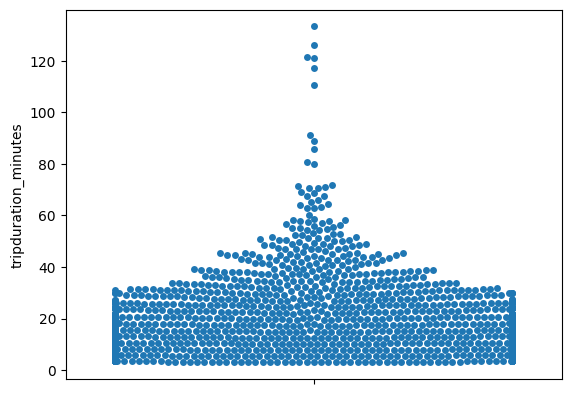

In [24]:
sns.swarmplot(data=df.sample(2000), y='tripduration_minutes');

#### Advantages: In the swarm plot, because there is no overlapping of data points allowed, the horizontal fill of the data points is meaningful and adds further visual emphasis to where the distribution of the dataset lies, whereas the horizontal distribution is not meaningful in the strip plot. Disadvantages: The swarm plot is slower to load and may not be able to place many data points overall in the resulting image. It will only work with a much smaller sample of the data if you are working with large datasets in the tens of thousands or more.

l) Make a violin plot representing trip duration.

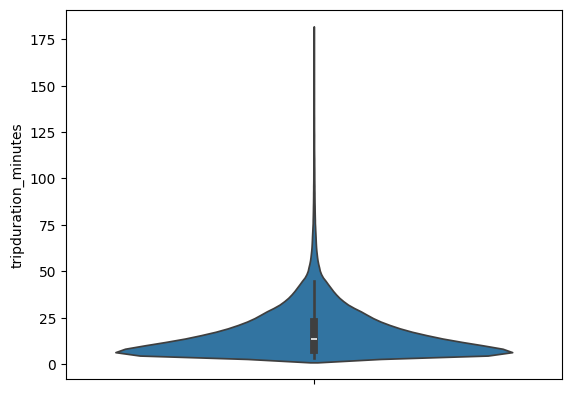

In [25]:
sns.violinplot(y='tripduration_minutes', data=df);

m) Make another violin plot representing trip duration, but this time grouped by gender and further split by user type. The result should be single figure enabling you to compare the distributions across both user type and gender. Describe what you seen in this plot. Does it suggest any potential relationship between trip duration, user type and/or gender?


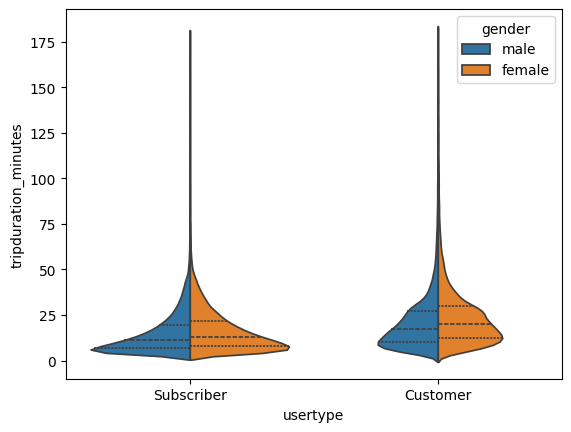

In [30]:
#use df_subgroup without unknown gender category
sns.violinplot(x='usertype', y='tripduration_minutes', hue='gender',
               split=True, inner='quartile', bw_method=0.1, data=df_subgroup);

#### Subscribers have a more concentrated data distribution for trip duration. Both usertypes show almost a mirror distribution when it comes to splitting by gender, so the usertypes are pretty consistent within that category. However, the female distribution lies higher up on trip duration axis for both, meaning that their average trip duration and generally their most frequent trip durations are longer in minutes than males across the dataset in both usertypes. Between the two usertypes, Customers have longer trip durations overall, with two peaks visible and a more evenly distributed interquartile range, while Subscribers have a more uniform distribution with a more dramatic peak skewing towards the 10-15 minute mark. Females may appear to be more likely to take longer bike trips in both groups; perhaps there is a point in the travel time calculation where people often choose a different type of transport for one-off trips and/or commuting, but that point is slightly higher (longer) for females.

a) Provide a five-number summary for distance_miles (minimum, 25th percentile, me- dian, 75th percentile, maximum).

In [31]:
df['distance_miles'].describe()

count    500000.000000
mean          1.367531
std           1.097055
min           0.000000
25%           0.610297
50%           1.057515
75%           1.814084
max          13.152597
Name: distance_miles, dtype: float64

b) Try making a few charts (i.e. histogram, density plot, box plot, strip plot) to visualize the distribution of distance_miles across the entire sample (you can include these charts as part of your assignment, but it’s not required). Which chart type or combination of chart types do you think is most effective for visualizing the distribution of distance_miles, and why?

#### From .25 miles to around 5 miles is where the majority of the distribution lies, which I find to be most obvious by looking at both the combination histogram/density plot with a bin-width of .25 miles, which shows the distribution overall, alongside the strip plot of a sample of the data, which gives a better sense of where the actual points lie. The combination histogram/kde shows that there is a slight dip in the frequency of trips below 1/4 mile, which makes sense because this is a short walking distance, while the majority of trips take place in the 1/4 mile to 2 mile range (roughly 70% of the trips).

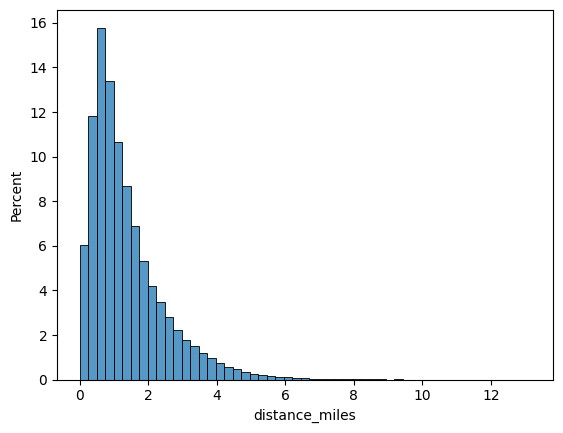

In [38]:
sns.histplot(data=df, x='distance_miles', stat= 'percent', binwidth=.25);

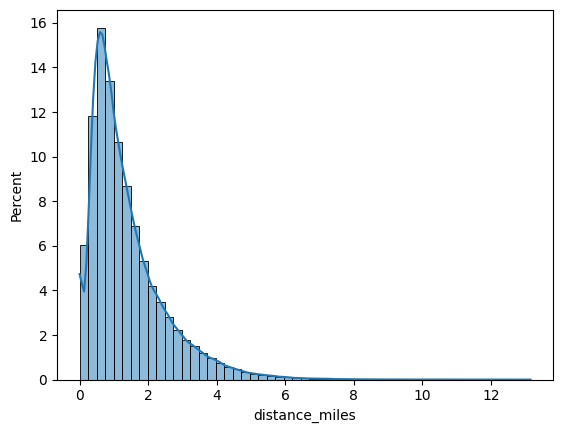

In [39]:
sns.histplot(data = df, x='distance_miles', stat='percent', binwidth = .25, kde=True);

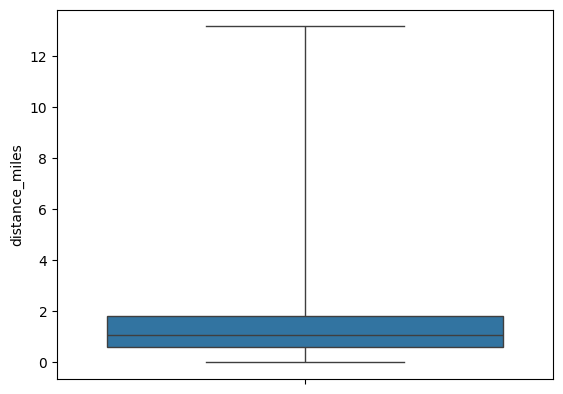

In [43]:
sns.boxplot(y=df['distance_miles'], whis=[0,100]);
#13 is an outlier

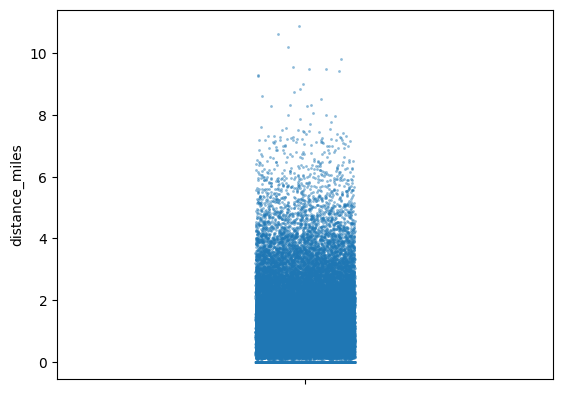

In [42]:
sns.stripplot(data=df.sample(50000), y='distance_miles', alpha=0.5, size=2);